Task 4: Fresnel Equations
===

(ABC version)

In [53]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import math as m

fignum = 0

In [54]:
nx = 1800
imp0 = 337.0


eps = np.ones(nx)
for i in range(nx):
    if (i >= int(nx/2)):
        eps[i] = 2
    else:
        eps[i] = 8
        
n1 = m.sqrt(eps[0])
n2 = m.sqrt(eps[-1])

In [55]:
srcori = int(nx/4)              #source origin
srcwid = 100*np.sqrt(eps[0])
srcdel = 10*srcwid              #source delay
nt = int(1.5*nx+srcdel)

In [56]:
ez = np.zeros(nx)
hy = np.zeros(nx)
x = np.arange(0,nx-1,1)

emaxleft = np.zeros(nt)
emaxright = np.zeros(nt)
hmaxleft = np.zeros(nt)
hmaxright = np.zeros(nt)

In [57]:
lc = 1/np.sqrt(eps[0])
la = (lc-1)/(lc+1)
lb = 2/(lc + 1)

rc = 1/np.sqrt(eps[-1])
ra = (rc-1)/(rc+1)
rb = 2/(rc + 1)

In [58]:
hwnp10, ewnp10 = 0,0 # W | ^{n+1} _{0}
hwnm11, ewnm11 = 0,0 # W | ^{n-1} _{1}
hwnp11, ewnp11 = 0,0 # W | ^{n+1} _{1}
hwnm10, ewnm10 = 0,0 # W | ^{n-1} _{0}
hwn0  , ewn0   = 0,0 # W | ^{n  } _{0}
hwn1  , ewn1   = 0,0 # W | ^{n  } _{1}

hwnp1im1, ewnp1im1 = 0,0 # W | ^{n+1} _{i-1}
hwnm1i  , ewnm1i   = 0,0 # W | ^{n-1} _{i  }
hwnp1i  , ewnp1i   = 0,0 # W | ^{n+1} _{i  }
hwnm1im1, ewnm1im1 = 0,0 # W | ^{n-1} _{i-1}
hwnim1  , ewnim1   = 0,0 # W | ^{n  } _{i-1}
hwni    , ewni     = 0,0 # W | ^{n  } _{i  }

n1: 2.8284271247461903
n2: 1.4142135623730951
tran fdtd: 0.888854641205
tran fresnel: 0.888888888889
tran err: 0.00385286442803


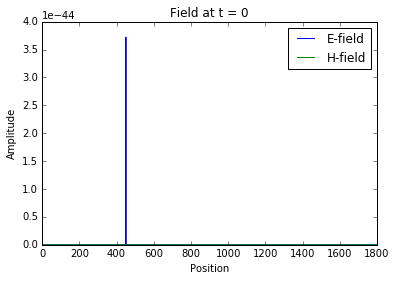

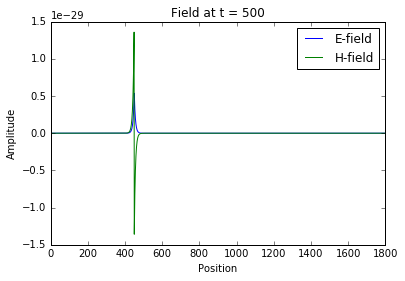

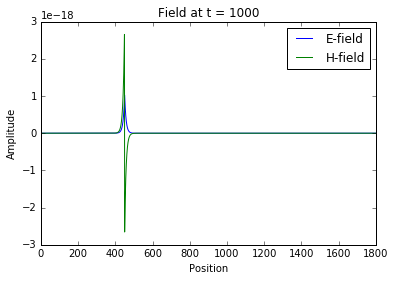

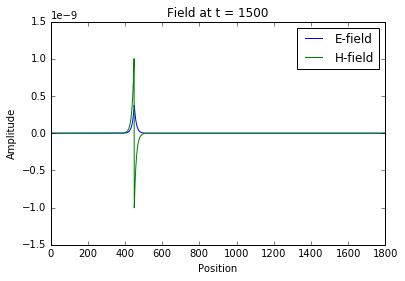

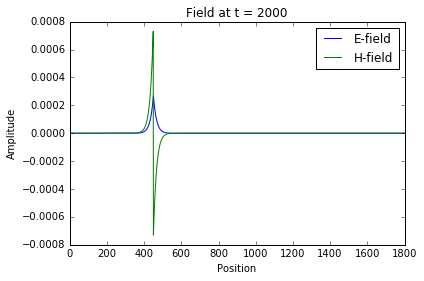

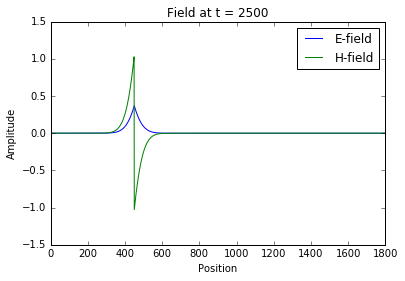

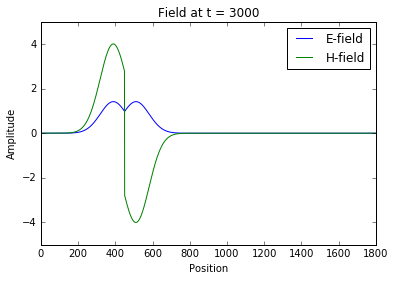

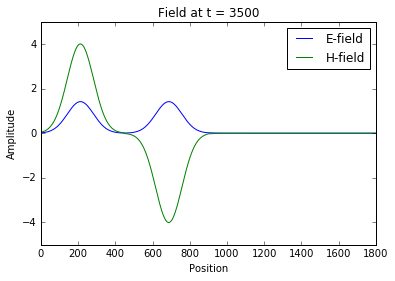

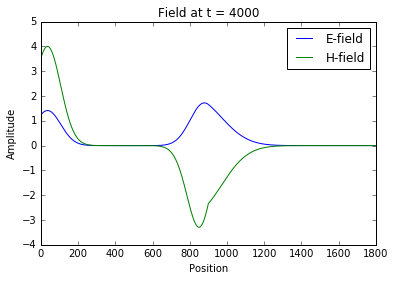

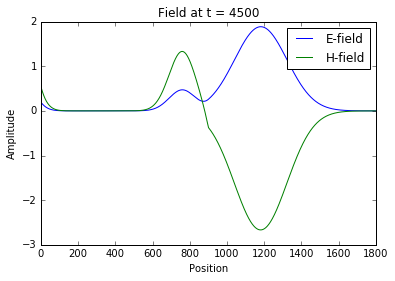

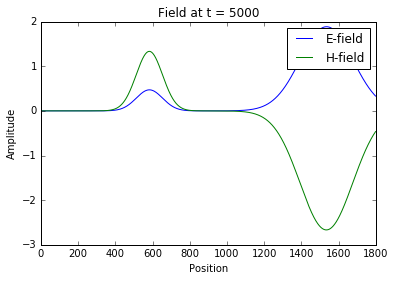

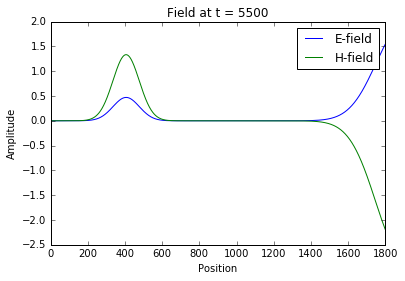

In [59]:
for dt in range(0,nt):
    ######################
    #Magnetic field
    ######################
    hy[x] = hy[x] + (ez[x+1] - ez[x])/imp0

    #abc at left
    hwnp11 = hy[1]
    hwnp10 = -hwnm11 + la*(hwnp11 + hwnm10) + lb*(hwn0 + hwn1)
    hy[0] = hwnp10
    hwnm11, hwnm10 = hwn1, hwn0
    hwn1, hwn0  = hwnp11, hwnp10
    
    #abc at right
    hwnp1im1 = hy[-2]
    hwnp1i = - hwnm1im1 + ra*(hwnp1im1 + hwnm1i) + rb*(hwnp1i + hwnim1)
    hy[-1] = hwnp1i
    hwnm1i, hwnm1im1 = hwni, hwnim1
    hwni, hwnim1  = hwnp1i, hwnp1im1
    
    ######################
    #Electric field
    ######################
    ez[x+1] = ez[x+1] + (hy[x+1]-hy[x])*imp0/eps[x]
    ez[srcori] += m.exp(-((dt-srcdel)*(dt-srcdel))/(srcwid*srcwid))

    #abc at left
    ewnp11 = ez[1]
    ewnp10 = -ewnm11 + la*(ewnp11 + ewnm10) + lb*(ewn0 + ewn1)
    ez[0] = ewnp10
    ewnm11, ewnm10 = ewn1, ewn0
    ewn1, ewn0  = ewnp11, ewnp10
    
    #abc at right
    ewnp1im1 = ez[-2]
    ewnp1i = - ewnm1im1 + ra*(ewnp1im1 + ewnm1i) + rb*(ewnp1i + ewnim1)
    ez[-1] = ewnp1i
    ewnm1i, ewnm1im1 = ewni, ewnim1
    ewni, ewnim1  = ewnp1i, ewnp1im1

    plt.hold(True)
    if (dt % 500 == 0):
#    if (dt == srcdel+srcwid+(0.75*nx)):
        fignum = fignum + 1
        plt.figure(fignum)
        plt.xlabel("Position")
        plt.ylabel("Amplitude")
        plt.title("Field at t = "+ str(dt))
        plt.plot(ez, label="E-field")
        plt.plot(hy*imp0, label="H-field")
        plt.legend()
        
    emaxleft[dt] = np.amax(np.absolute(ez[0:int(nx/4)]))
    emaxright[dt] = np.amax(np.absolute(ez[int(0.5*nx):nx]))
    hmaxleft[dt] = np.amax(np.absolute(imp0*hy[0:int(nx/4)]))
    hmaxright[dt] = np.amax(np.absolute(imp0*hy[int(0.5*nx):nx]))


einc = np.amax(emaxleft)
eref = np.amax(emaxleft[int(srcdel+srcwid+(0.5*nx)):nt])
etra = np.amax(emaxright)

hinc = np.amax(hmaxleft)
href = np.amax(hmaxleft[int(srcdel+srcwid+(0.5*nx)):nt])
htra = np.amax(hmaxright)

tranfdtd = (etra*htra)/(einc*hinc)
reflfdtd = (eref*href)/(einc*hinc)
reflfren = np.absolute((n2-n1)/(n1+n2))**2
tranfren = 1-reflfren

print("n1: " + str(n1))
print("n2: " + str(n2))
print("tran fdtd: " + str(tranfdtd))
#print("refl fdtd: " + str(reflfdtd))
#print("refl fresnel: " + str(reflfren))
print("tran fresnel: " + str(tranfren))
#print("refl err: " + str(100*np.absolute(reflfren-reflfdtd)/reflfren))
print("tran err: " + str(100*np.absolute(tranfren-tranfdtd)/tranfren))
#print("fdtd R+T: " + str(reflfdtd+tranfdtd))

